# Описание проекта

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Содержание проекта**
- [Шаг 1. Общая информация о данных](#Шаг-1.-Общая-информация-о-данных)
- [Шаг 2. Подготовка данных](#Шаг-2.-Подготовка-данных)
 - [2.1 Обработка пропусков](#2.1-Обработка-пропусков)
 - [2.2 Замена типов данных](#2.2-Замена-типов-данных)
 - [2.3 Добавление расчетных данных](#2.3-Добавление-расчетных-данных)
- [Шаг 3. Исследовательский анализ данных](#Шаг-3.-Исследовательский-анализ-данных)
 - [3.1 Выпуск игр по годам](#3.1-Выпуск-игр-по-годам)
 - [3.2 Продажи по платформам](#3.2-Продажи-по-платформам)
 - [3.3 "Ящики с усами" по продажам игр и в разбивке по платформам](#3.3-"Ящики-с-усами"-по-продажам-игр-и-в-разбивке-по-платформам)
 - [3.4 Корреляция между отзывами и продажами](#3.4-Корреляция-между-отзывами-и-продажами) 
 - [3.5 Исследование игровых жанров](#3.5-Исследование-игровых-жанров) 
- [Шаг 4. Портрет пользователя по регионам](#Шаг-4.-Портрет-пользователя-по-регионам) 
 - [4.1 Самые популярные платформы по регионам](#4.1-Самые-популярные-платформы-по-регионам)
 - [4.2 Самые популярные жанры по регионам](#4.2-Самые-популярные-жанры-по-регионам)
 - [4.3 Рейтинг ESRB и продажи в регионе](#4.3-Рейтинг-ESRB-и-продажи-в-регионе)
- [Шаг 5. Проверка гипотез](#Шаг-5.-Проверка-гипотез)
 - [5.1 Сравнение средних пользовательских рейтингов платформ Xbox One и PC](#5.1-Сравнение-средних-пользовательских-рейтингов-платформ-Xbox-One-и-PC)
 - [5.2 Сравнение средних пользовательских рейтингов жанров Action и Sports](#5.2-Сравнение-средних-пользовательских-рейтингов-жанров-Action-и-Sports)
- [Шаг 6. Общий вывод](#Шаг-6.-Общий-вывод)

**Описание данных**

 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг 1. Общая информация о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import math as mt
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

Итак, начнем изучать набор данных, прочтя его первые строки и применив к нему методы info() и describe().

In [2]:
games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Обращают на себя внимание 2 пропуска в столбце с названием игры.

Около 250 пропусков в годе выпуска.

Оценка критиков, пользователей и рейтинг доступны примерны для половины игр.

In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


После вызова метода describe() появились подозрения на скрытые пропуски.

Данные по продажам в регионах имеют очень низкую среднюю, значит, скорее всего там нет данных и они заполнены нулями.

## Шаг 2. Подготовка данных

### 2.1 Обработка пропусков

Приведем названия столбцов к нижнему регистру.

In [6]:
games.columns = games.columns.str.lower()

Прежде, чем изменять тип данных столбцов, необходимо проверить данные на дубликаты и избавиться от пропусков.

Проверим датафрейм на наличие дубликатов.

In [7]:
dups = games[games.duplicated()]
dups

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Дубликатов нет.

Переходим к пропускам.

Есть 2 пропуска в названии игр. Проверим.

In [8]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


По играм с пропущенным годом у нас нет информации также и о жанре.

Восстановить такую информацию не представляется возможным, поэтому избавимся от этих строк.

In [9]:
games = games.dropna(subset=['name']).reset_index(drop=True)
games.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16712,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Далее. Есть около 250 пропусков в годе релиза.

Посмотрим на эти игры.

In [10]:
games[games['year_of_release'].isna()].sort_values('na_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
...,...,...,...,...,...,...,...,...,...,...,...
10999,Demon Chaos,PS2,NaN,Action,0.00,0.00,0.09,0.00,NaN,NaN,NaN
10836,Egg Monster Hero,DS,NaN,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,E
15020,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,NaN,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10763,Luminous Arc 2 (JP sales),DS,NaN,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN


Всего 269 пропусков в этом столбце.

Обращает на себя внимание, что среди пропусков присутствуют игры, выходившие на разных платформах.

Например, Madden NFL 2004

In [11]:
games.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1880,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3888,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5707,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Посмотрим, какие значения присутствуют в столбце "год выпуска".

In [12]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Видно, что нулевых значений в годах выпуска нет, значит, попробуем заполнить оставшиеся пропуски в годе выпуска нулями. Сделаем это для того, чтобы преобразовать тип данных в столбце, а также не лишиться потенциально полезных данных в других столбцах.

Заполним нулями, чтобы в будущем при необходимости легко можно было делать срезы по этому нулю. 

In [13]:
games['year_of_release'] = games['year_of_release'].fillna(0)

Вообще пропуски в годе релиза могли быть допущены, как мы уже убедились, из-за того, что год не был указан для отдельных платформ. Возможно, составители базы данных посчитали, что указав год для одной платформы, для других делать это необязательно.

Пропуски в столбцах с оценкой критиков и пользователей также заполним нулями, чтобы не потерять данные и при необходимости делать срезы по нулю. Заполнять пропуски для одинаковых игр оценкой по другим платформам выглядит ненадежным - так как удовольствие от игры на разных платформах может сильно зависеть от особенностей свмой платформы.

Но сначала стоит проверить, нет ли нулей в значениях оценок критиков и пользователей.

Для этого напишем функцию.

In [14]:
# функция принимает на вход датафрейм и строку с названием столбца
# далее формируется список уникальных значений и проверяется, есть ли там 0
def check_for_zeros(dataframe, column):
    list_of_unique_values = dataframe[column].unique()
    if 0 in list_of_unique_values:
        print('Среди значений есть нули')
    else:
        print('Нулей среди значений нет')

In [15]:
check_for_zeros(games, 'user_score')

Нулей среди значений нет


In [16]:
check_for_zeros(games, 'critic_score')

Нулей среди значений нет


Нулей в оценках критиков и пользователей нет, значит заполним пропуски нулями.

In [17]:
games['user_score'] = games['user_score'].fillna(0)
games['critic_score'] = games['critic_score'].fillna(0)

Проверим, какие значения у нас в столбце "оценка пользователей".

In [18]:
games['user_score'].value_counts()

0      6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
0.5       2
1         2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

Видим, что около 2500 строк имеют значение "tbd", которые можно трактовать как "to be determined" или "предстоит определить". По всй видимости, данные об игре были занесены в таблицу до того, как была получены оценка от пользователей. Зполнять это значение чем-то средним меду платформами также опасно, как и в случае пропусков. Поэтому будем трактовать "tbd" как пропуски и заменим на 0.

In [19]:
games['user_score'] = games['user_score'].replace('tbd', 0)

In [20]:
games['user_score'].value_counts()

0      9123
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
9.6       2
0.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Далее обратимся к пропускам в столбце с рейтингом.

In [21]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Выдвинем гипотезу о том, что одинаковые игры на разных платформах имеют одинаковый рейтинг.

Поэтому снова заполним пропуски группировкой по названию игры.

In [22]:
games['rating'] = (
                            games.sort_values('rating', ascending=True)['rating']
                            .fillna(games.groupby(['name'])['rating'].transform('first'))
)

In [23]:
games['rating'].value_counts()

E       4151
T       3094
M       1653
E10+    1470
EC        10
K-A        4
RP         3
AO         1
Name: rating, dtype: int64

Нам удалось заполнить достаточное количество строк.

Есть редкие значения, но каких-то странных нет. Поэтому заполним пропуски значением "Not defined"

In [24]:
games['rating'] = games['rating'].fillna('Not defined')

In [25]:
games['rating'].value_counts()

Not defined    6327
E              4151
T              3094
M              1653
E10+           1470
EC               10
K-A               4
RP                3
AO                1
Name: rating, dtype: int64

In [26]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 2.2 Замена типов данных

In [27]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,Not defined
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,Not defined


 Кандидатами на замену типа данных являются год выпуска и оценка критиков.
 
 Год выпуска - попробуем перевести в целочисленный тип, так как при приведении к типу datetime у нас появятся 01-01 - 1 января.
 
Проверим, нет ли цифр после запятой в столбце 'оценка критиков'.

Для этого получим деление от остатка оценки на 1, если оно равно нулю, то будем считать, что это целое число.

In [28]:
len(games[games['critic_score'] % 1 == 0])

16713

Всего таких оценок 16713, что совпадает с общим количеством оценок.

Значит, столбцы 'оценка критиков' и 'год_выпуска' переводим в целочисленный тип.

In [29]:
games[['year_of_release', 'critic_score']] = games[['year_of_release', 'critic_score']].astype('int')

In [30]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,Not defined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,Not defined


Столбец с оценками пользователей стоит перевести в тип float.

In [31]:
games['user_score'] = games['user_score'].astype('float')

In [32]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,Not defined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,Not defined


In [33]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


### 2.3 Добавление расчетных данных

Добавим столбец с продажами во всех регионах.

In [34]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [35]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,Not defined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,Not defined,31.38


In [36]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


### Вывод 

Итак, мы обработали пропуски.

Пропуски в столбце "год выпуска" мы решили не заполнять конкретным годами, так как слишком мало новых значений, а искажения повлияют на дальнейший анализ. Поэтому пропуски заполним нулями.

Пропуски в оценках критиков и пользователей заполнили нулями, чтобы в будущем можно было делать по этим нулям срезы.

Также произвели замену типа данных.

## Шаг 3. Исследовательский анализ данных

### 3.1 Выпуск игр по годам

Посмотрим на динамику выпуска игр по годам. Для этого создадим сводную таблицу, в которой сгруппируем даныне по году выпуска.

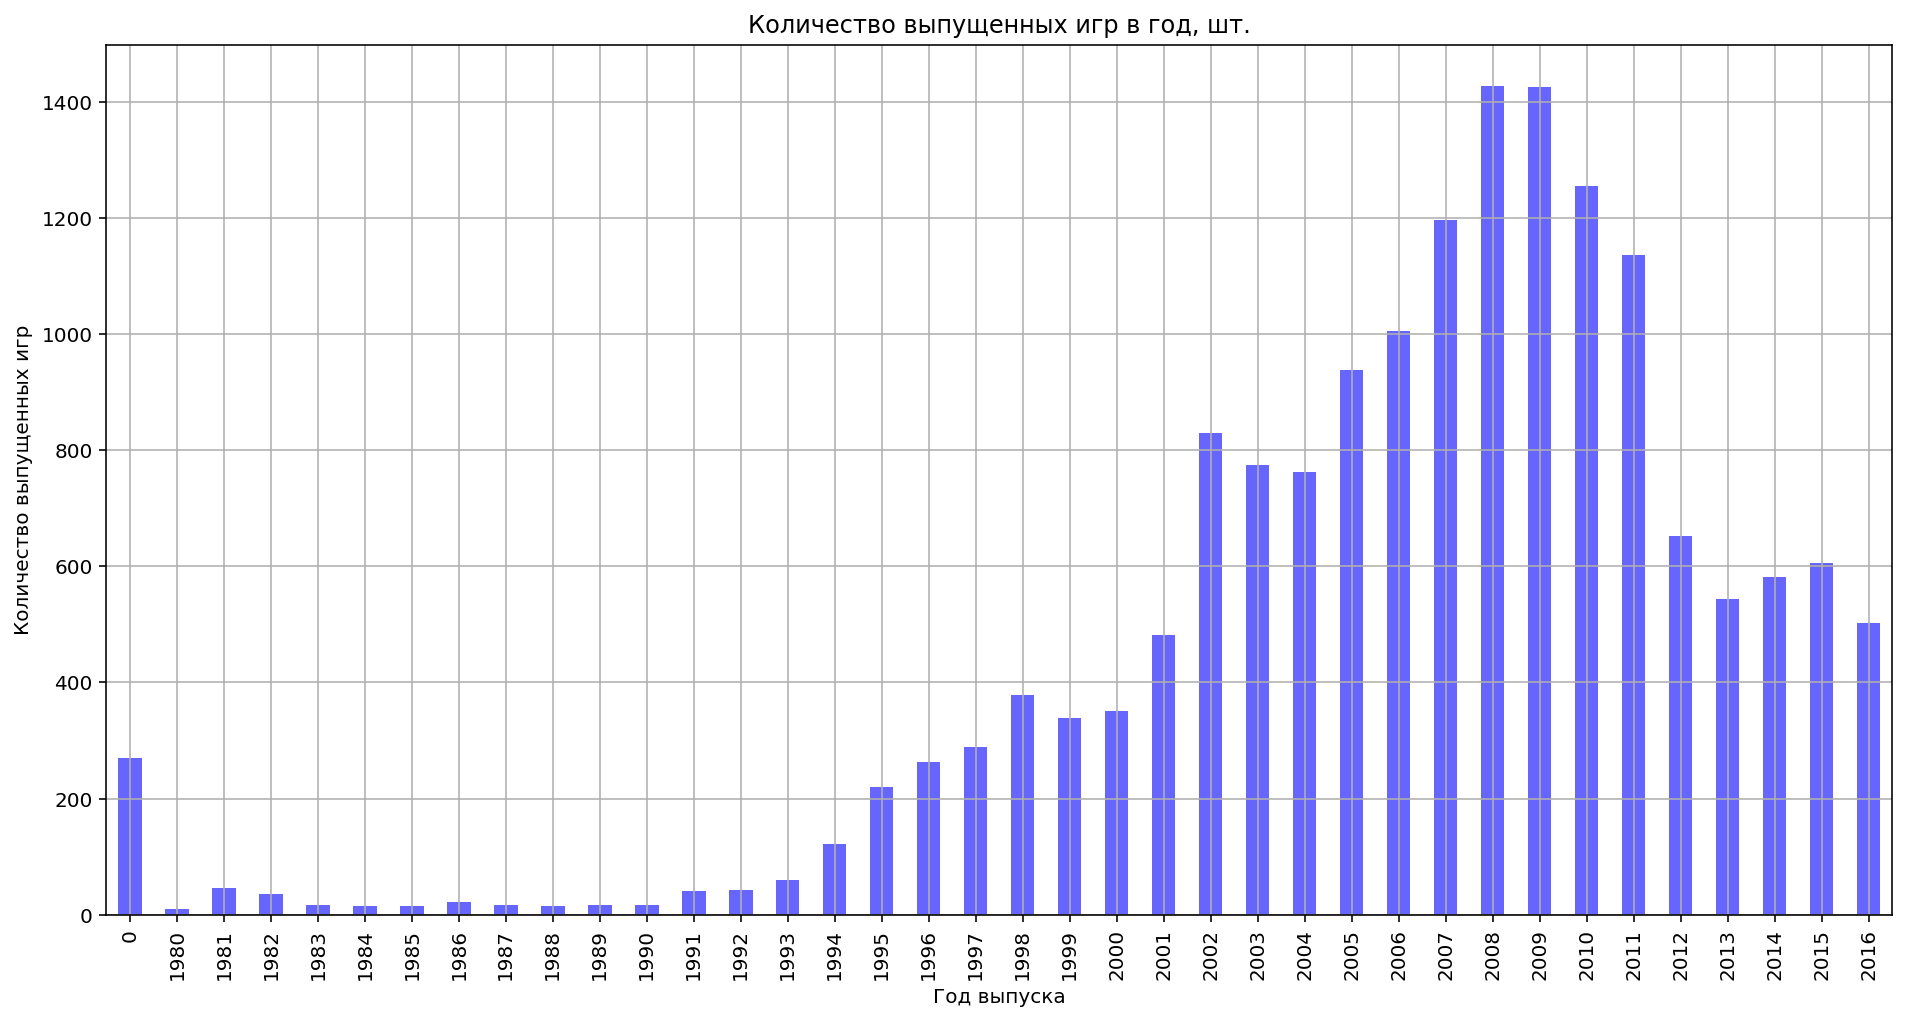

In [37]:
games_by_year = games.pivot_table(index='year_of_release', values='name', 
                                  aggfunc='count')
games_by_year.plot(kind='bar', figsize = (16, 8), legend=False, color = 'b', alpha=0.6, grid=True,
                   title='Количество выпущенных игр в год, шт.')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр');

Видно, что с 1991 года начался стремительный рост выпуска игр, достигший своего пика в 2008 году.

2012 год ознаменовался резким снижением выхода игр, и в последующие годы в год в среднем выходило около 600 игр.

Для нашего планирования кампании на 2017 год данные до 1991 года, когда было очень мало релизов, вряд ли сильно пригодятся.

### 3.2 Продажи по платформам

Далее проанализируем, игры для каких платформ продавались более успешно.

Сперва построим сводную таблицу, где сгруппируем игры по платформам и просуммируем общие продажи.

In [38]:
games_sales_by_platform =(
                            games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                            .sort_values('total_sales', ascending=False)
                         )
games_sales_by_platform.head(20)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Итак, у нас есть таблица с продажами по платформам, отсортированная по убыванию суммы релизов.

Узнаем, сколько всего игр было продано за рассматриваемый период.

In [39]:
overall_sales = games_sales_by_platform['total_sales'].sum()
print(f'{overall_sales:.0f} млн копий')

8913 млн копий


Почти 9 млрд копий на всех платформах.

Также выделяется группа лидеров - PlayStation 1-3, Nintendo DS и Wii, а также Xbox 360 лидируют с большим отрывом.

In [40]:
print(f"{games_sales_by_platform['total_sales'][0:6].sum() / overall_sales * 100:.2f} %")

62.95 %


На эти платформы приходится почти две трети всех игровых релизов в рассматриваемом периоде.

Определим лидирующие платформы.

In [41]:
leaders = games_sales_by_platform[0:6]

Далее создадим сводную таблицу, где посчитаем продажи в год для каждой крупнейшей платформы, сгруппировав данные по году выпуска и платформе.

In [42]:
leader_platforms = (
    games.query('platform in @leaders.index and year_of_release > 1993')
    .pivot_table(index=('year_of_release', 'platform'), values='total_sales', aggfunc='sum').reset_index()
)
leader_platforms

,year_of_release,platform,total_sales
0,1994,PS,6.03
1,1995,PS,35.96
2,1996,PS,94.70
3,1997,PS,136.17
4,1998,PS,169.49
...,...,...,...
61,2015,Wii,1.14
62,2015,X360,11.96
63,2016,PS3,3.60
64,2016,Wii,0.18


На основе этой таблицы построим график.

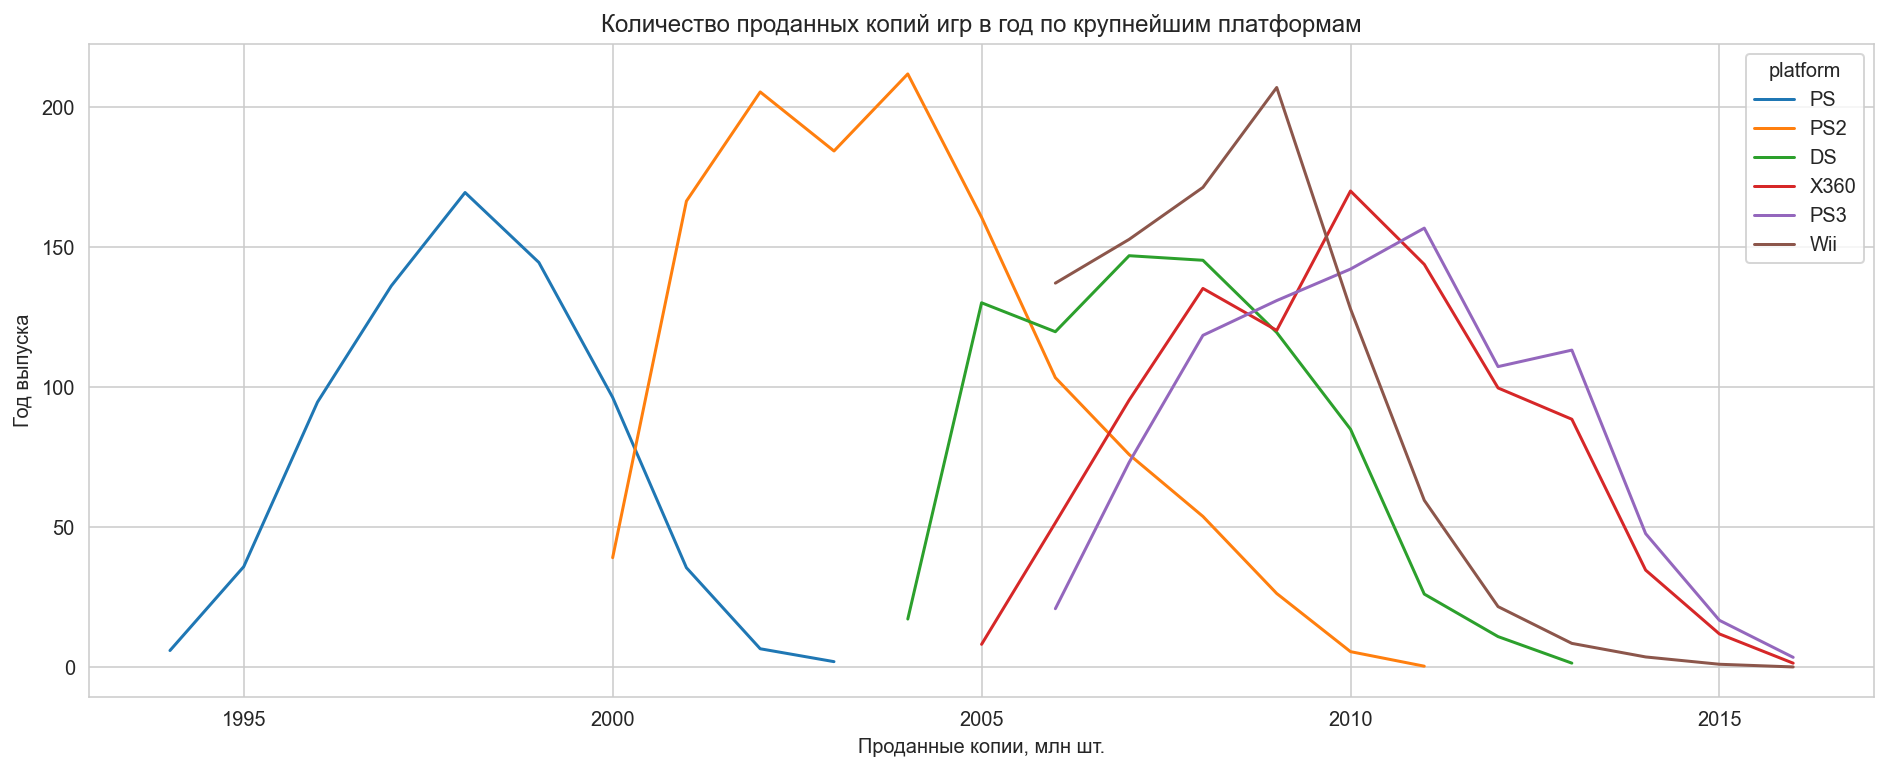

In [43]:
%matplotlib inline

sns.set_style('whitegrid')

f, ax = plt.subplots(figsize = (16, 6))

sns.lineplot(data = leader_platforms, x='year_of_release', y='total_sales', hue='platform')
plt.title('Количество проданных копий игр в год по крупнейшим платформам')
plt.xlabel('Проданные копии, млн шт.')
plt.ylabel('Год выпуска');

Далее проанализируем сроки жизни платформ на цифрах.

Отберем крупнейшие 20 платформ по продажам копий. Так гарантированно войдут успешные платформы.

In [44]:
leaders_for_platform_life = games_sales_by_platform[0:20]

Далее создадим сводную таблицу, где отсортируем данные по возрастанию года выпуска игры, сгруппируем данные по платформам и выделим первый год релиза.

Не забудем сделать срез год выпуска > 0.

In [45]:
games_sales_by_platform_first_year =(
                games.query('year_of_release > 0 and platform in @leaders_for_platform_life.index')
                .sort_values('year_of_release')
                .pivot_table(index='platform', values='year_of_release', aggfunc='first')
                         )
games_sales_by_platform_first_year.columns = ['first_year_of_release']
games_sales_by_platform_first_year.sort_values('first_year_of_release')

,first_year_of_release
platform,
2600,1980
NES,1983
DS,1985
PC,1985
GB,1988
SNES,1990
PS,1994
N64,1996
GBA,2000


Здесь мы замечаем, что у платформы DS первая игра вышла в 1985 году, но это невозможно, так как платформа была выпущена в 2004 году.

In [46]:
games.query('year_of_release == 1985 and platform == "DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15955,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0,0.0,Not defined,0.02


Удалим ее из датасета.

In [47]:
games = games.drop(games.loc[games['name'] == 'Strongest Tokyo University Shogi DS' ].index).reset_index(drop=True)

Еще раз построим сводную таблицу.

In [48]:
games_sales_by_platform_first_year =(
                games.query('year_of_release > 0 and platform in @leaders_for_platform_life.index')
                .sort_values('year_of_release')
                .pivot_table(index='platform', values='year_of_release', aggfunc='first')
                         )
games_sales_by_platform_first_year.columns = ['first_year_of_release']
games_sales_by_platform_first_year.sort_values('first_year_of_release')

,first_year_of_release
platform,
2600,1980
NES,1983
PC,1985
GB,1988
SNES,1990
PS,1994
N64,1996
GBA,2000
XB,2000


Затем построим сводную таблицу похожим образом, но возьмем последний год выпуска.

In [49]:
games_sales_by_platform_last_year =(
                         games.query('year_of_release > 0 and platform in @leaders_for_platform_life.index')
                        .sort_values('year_of_release')
                        .pivot_table(index='platform', values='year_of_release', aggfunc='last')
                         )
games_sales_by_platform_last_year.columns = ['last_year_of_release']
games_sales_by_platform_last_year.sort_values('last_year_of_release')

,last_year_of_release
platform,
2600,1989
NES,1994
SNES,1999
GB,2001
N64,2002
PS,2003
GBA,2007
GC,2007
XB,2008


Создадим новую таблицу, где посчитаем срок жизни платформы вычетом первого года релиза из последнего.

In [50]:
platform_life = games_sales_by_platform_first_year.join(games_sales_by_platform_last_year)
platform_life['life'] = platform_life['last_year_of_release'] - platform_life['first_year_of_release']
platform_life = platform_life.sort_values('life', ascending=False)
platform_life

,first_year_of_release,last_year_of_release,life
platform,,,
PC,1985,2016,31
GB,1988,2001,13
PS2,2000,2011,11
X360,2005,2016,11
PSP,2004,2015,11
NES,1983,1994,11
PS3,2006,2016,10
Wii,2006,2016,10
SNES,1990,1999,9


Очевидно, что выброс есть для PC - игры для ПК выпускаются с 1985 года, железо обновляется каждый год.

Посчитаем медианный и средний срок жизни платформ, исключив ПК и игры, платформы, для которых выходили релизы в 2016 году.



In [51]:
platform_life.query('last_year_of_release != 2016 and platform != "PC"')['life'].median()

9.0

In [52]:
platform_life.query('last_year_of_release != 2016 and platform != "PC"')['life'].mean()

9.083333333333334

Итак, получается, что в прошлом успешные платформы жили в среднем около 9 лет. Вероятно, этот показатель будет даже выше, потому что мы исключили из анализа устаревшие, но успешные X360 и PS3, которые может и поивут еще в 2017 и дальше.

Итак, мы получили график и расчеты, демонстрирующие суммарные продажи игр по крупнейшим платформам в год.

Из графика можно сделать следующие выводы:

1. Самый долгий срок жизни платформы - 31 год. Это персональный компьютер, который по сути является постоянно обновляющейся платформой.


2. Если говорить о консолях, то самый долгий срок жизни - 13 лет. При этом данные графика говорят, что по истечении 11 лет, продажи игр для платформы падают до совсем не значительного уровня. Бывает, это происходит и быстрее.


3. Пик продаж для отдельной платформы длится 4-6 лет.


4. Следовательно, **актуальным периодом** мы выберем 2012-2016 гг. Такой период отразит изменившиеся правила на рынке игр, где консолям приходится вынужденно конкурировать с мобильными устройствами. Также сюда попадут только актуальные платформы.


5. Данный график не показывает, какие платформы являются лидирующими в настоящее время - 2015-2016 гг. Следовательно, нам нужно будет еще раз проанализировать общие продажи, чтобы выявить лидирующие платформы в актуальном периоде. 

Далее проанализируем динамику прода по платформам в периоде, максимально приближенном к 2016 году.

Сам 2016 год для этих целей мы брать не будем, потому что там представлены данные на полный год.

Сделаем срез по 2013 - 2015 годам.

Создадим сводную таблицу, где в столбцах будут суммарные продажи за соответствующий год по платформам.

In [53]:
games_dynamics =(
                    games.query('2012 < year_of_release < 2016')
                    .pivot_table(index='platform', columns='year_of_release', 
                                 values='total_sales', aggfunc='sum')
                    .sort_values(2015, ascending=False))
                         

games_dynamics

year_of_release,2013,2014,2015
platform,,,
PS4,25.99,100.00,118.90
XOne,18.96,54.07,60.14
3DS,56.57,43.76,27.78
PS3,113.25,47.76,16.82
WiiU,21.65,22.03,16.35
X360,88.58,34.74,11.96
PC,12.38,13.28,8.52
PSV,10.59,11.90,6.25
Wii,8.59,3.75,1.14


Добавим столбец, где посчитаем темп прироста продаж за 2015 год.

In [54]:
games_dynamics['2015/2014 change, %'] = round((games_dynamics[2015] / 
                                               games_dynamics[2014] - 1) * 100, 2)
games_dynamics

year_of_release,2013,2014,2015,"2015/2014 change, %"
platform,,,,
PS4,25.99,100.00,118.90,18.90
XOne,18.96,54.07,60.14,11.23
3DS,56.57,43.76,27.78,-36.52
PS3,113.25,47.76,16.82,-64.78
WiiU,21.65,22.03,16.35,-25.78
X360,88.58,34.74,11.96,-65.57
PC,12.38,13.28,8.52,-35.84
PSV,10.59,11.90,6.25,-47.48
Wii,8.59,3.75,1.14,-69.60


Как видно из данных, положительную динамику в самом актуальном периоде с полными данными показывают только 2 платформы - PS4 и XOne. Снижение продаж по остальным платформам выглядит драматичным.

Принимая во внимание тот факт, что пик продаж для платформы длится около 4-6 лет, можно ожидать, что продажи PS4 и XOne еще минимум 2 года будут находится на высоком уровне (2016-2017), но, возможно, этот благоприятный период продержится и дальше (2018-2019).

В общем, такая гипотеза, наверное, бы потвердилась, знай мы данные за 2016-2020 гг.

Но, по крайней мере, нам известно, что выпуск платформ новых поколений PlayStation 5 и Xbox Series X запланирован на конец 2020 года.

### 3.3 "Ящики с усами" по продажам игр и в разбивке по платформам

Итак, сначала определим данные для актуального периода 2012-2016 гг.

In [55]:
games_actual = games.query('year_of_release > 2011')

Затем построим "ящик с усами" для по глобальным продажам игр безотносительно платформ.

Медиана глобальных продаж игр: 0.12 млн шт.
Среднее глобальных продаж игр: 0.50 млн шт.


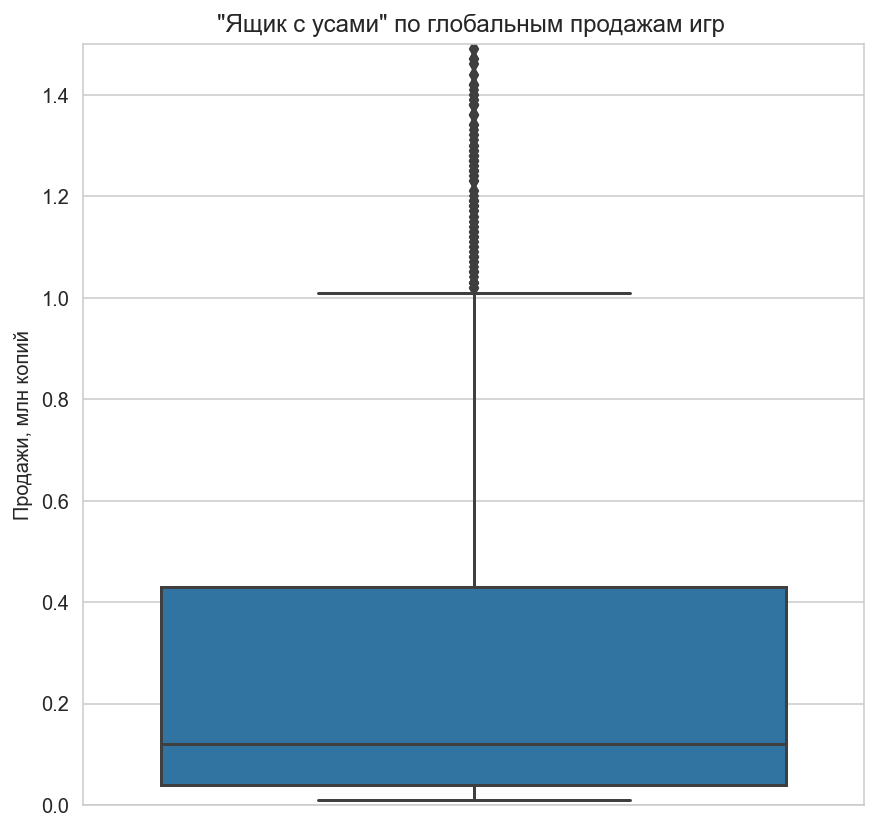

In [56]:
ax = plt.subplots(figsize=(7,7))
chart_for_platforms = sns.boxplot(data=games_actual, y='total_sales').set_ylim([0,1.5])
plt.title('"Ящик с усами" по глобальным продажам игр ')
plt.ylabel('Продажи, млн копий')

print(f"Медиана глобальных продаж игр: {games_actual['total_sales'].median():.2f} млн шт.")
print(f"Среднее глобальных продаж игр: {games_actual['total_sales'].mean():.2f} млн шт.")

Итак, в среднем игра продается тиражом около 0.5 млн копий.

При этом медианное значение около 120 тыс. копий. Такое различие объсняется хитами, продающимися многомиллионными тиражами. 

Далее построим "ящики" по глобальным продажам в разбивке по платформам.

Для этого создадим сводную таблицу по продажам по платформам в актуальном периоде и отберем десятку лидеров.

In [57]:
games_sales_by_platform_actual =(
                            games_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                            .sort_values('total_sales', ascending=False)
                         )
games_sales_by_platform_actual
leaders_actual = games_sales_by_platform_actual[0:7]
leaders_actual

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65


Теперь построим "ящики" по лидирующим платформам и выведем их на одном графике.

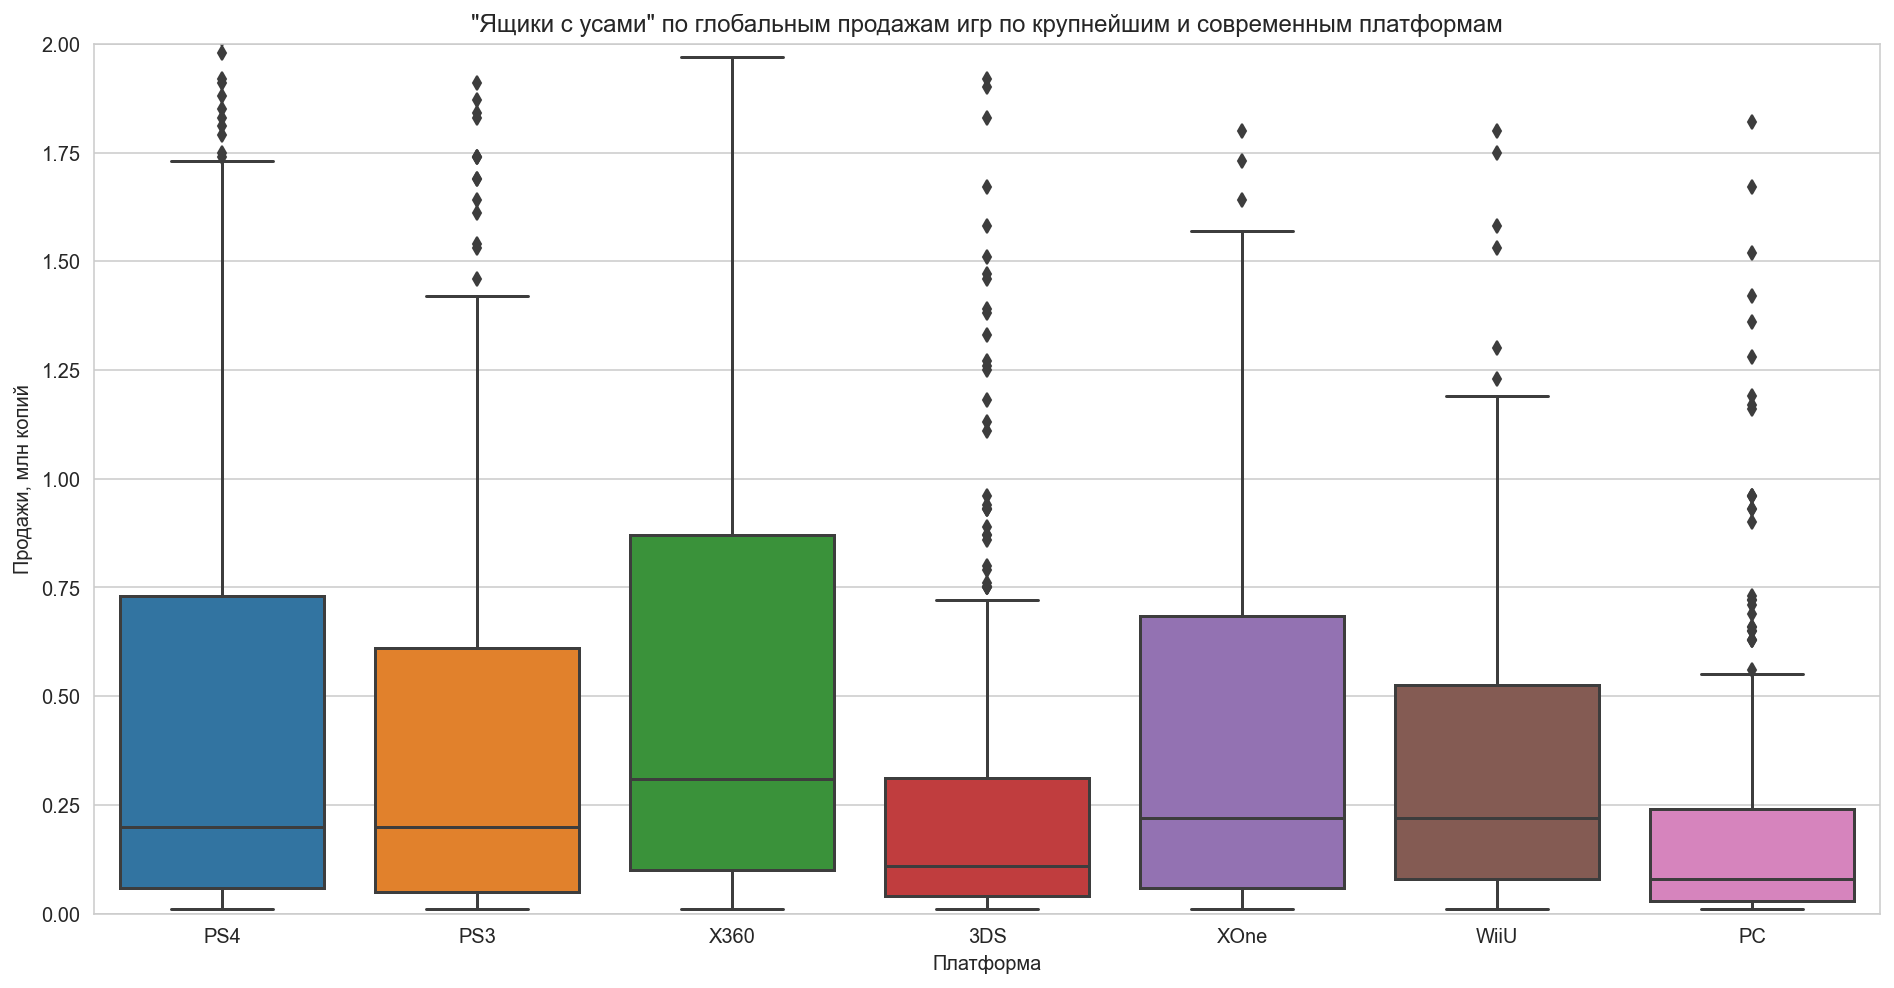

In [58]:
ax = plt.subplots(figsize=(16,8))
chart_for_platforms = sns.boxplot(data=games_actual.query('platform in @leaders_actual.index'),
                    y='total_sales', x='platform',order=leaders_actual.index).set_ylim([0,2])
plt.title('"Ящики с усами" по глобальным продажам игр по крупнейшим и современным платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн копий');

In [59]:
for platform in leaders_actual.index:
    print(platform)
    print(f"Медиана глобальных продаж игр: {games_actual.query('platform==@platform')['total_sales'].median():.2f} млн шт.")
    print(f"Среднее глобальных продаж игр: {games_actual.query('platform==@platform')['total_sales'].mean():.2f} млн шт.\n")

PS4
Медиана глобальных продаж игр: 0.20 млн шт.
Среднее глобальных продаж игр: 0.80 млн шт.

PS3
Медиана глобальных продаж игр: 0.20 млн шт.
Среднее глобальных продаж игр: 0.59 млн шт.

X360
Медиана глобальных продаж игр: 0.31 млн шт.
Среднее глобальных продаж игр: 0.81 млн шт.

3DS
Медиана глобальных продаж игр: 0.11 млн шт.
Среднее глобальных продаж игр: 0.49 млн шт.

XOne
Медиана глобальных продаж игр: 0.22 млн шт.
Среднее глобальных продаж игр: 0.65 млн шт.

WiiU
Медиана глобальных продаж игр: 0.22 млн шт.
Среднее глобальных продаж игр: 0.56 млн шт.

PC
Медиана глобальных продаж игр: 0.08 млн шт.
Среднее глобальных продаж игр: 0.25 млн шт.



Видно, что медианные значения самые высокие у X360 - в диапазоне 310 тыс. копий. На мой взгляд, это объясняется тем, что Майкрософт как крупный издатель игр и крупнейшая корпорация в состоянии оказывать своим продуктам существенную рекламную поддерку, отсюда и высокие медианные продажи.

Существенно им уступают WiiU, PS3, PS4 и XOne 200-220 тыс. копий.

Медианные продажи по другим платформам существенно ниже. Интересно, что самым низким значением обладает PC. Это, видимо, связано с пиратством, так как играть на ПК нелегально достаточно легко, и трудно - на консолях.

Самым высоким средним значением обладают X360 и PS4 - около 800 тыс. копий.

Их граница аномальных значений лежит выше 1.75 млн копий.

### 3.4 Корреляция между отзывами и продажами

Посмотрим, как влияют на продажи отзывы критиков и пользователей.

Для начала возьмем одну платформу и проанализируем ее. Пусть это будет PS3.

Создадим срез по этой платформе и выберем игры с ненулевыми значениями баллов критиков и пользователей.

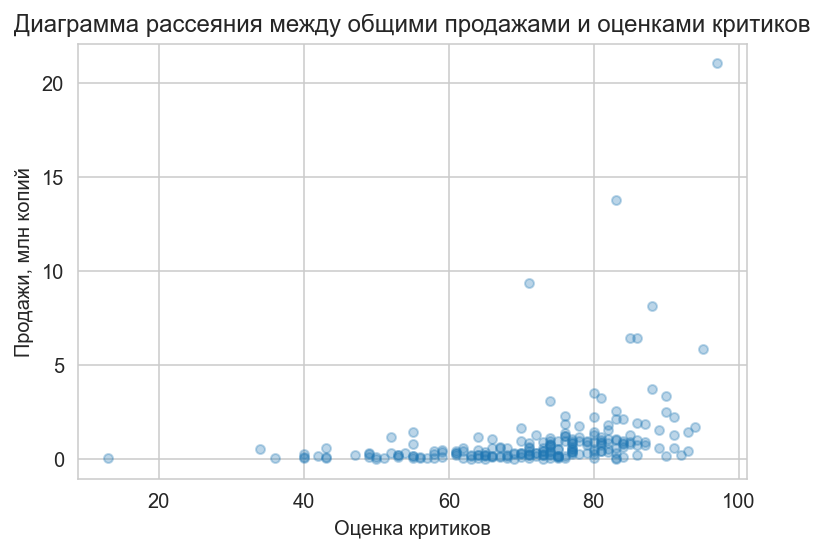

In [60]:
PS3_sales = games_actual.query('platform=="PS3" and user_score > 0 and critic_score > 0')
PS3_sales.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.3)
plt.title('Диаграмма рассеяния между общими продажами и оценками критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн копий');

Видно, что в целом есть некоторая связь между оценками критиков и обшими продажами.

Игры с самым большим числом проданных копий имеют более высокие оценки критиков.

Посмтрим, как обстоят дела с оценками пользователей игр на PS3.

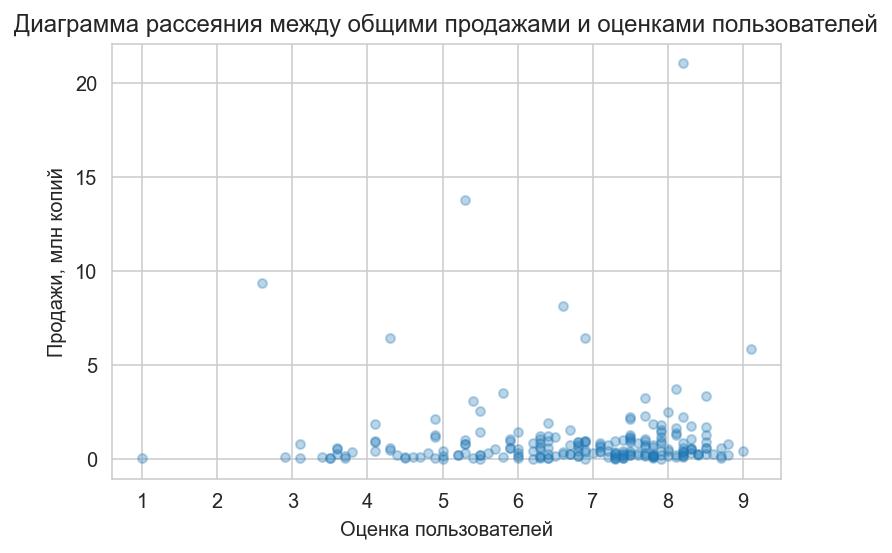

In [61]:
PS3_sales.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.3)
plt.title('Диаграмма рассеяния между общими продажами и оценками пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн копий');

Здесь видна более слабая связь, кроме того, высочайшего уровня продаж достигали игры с очень низкими оценками.

Построим матрицу корреляции.

In [62]:
PS3_sales_corr_table = PS3_sales[['total_sales', 'user_score', 'critic_score']]
PS3_sales_corr_table.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.003227,0.331057
user_score,0.003227,1.000000,0.539456
critic_score,0.331057,0.539456,1.000000


Видно, что по платформе PS3 связь между общими продажами и оценками критиков слабая.

Но между продажами и оценками пользователей она еще слабее.

Наверное, это связано с тем, что пользователи покупают игры, основываясь на рекламной кампании и собственных впечатлениях от полученной информации о продукте. Также могут влиять оценки критиков, потому что, наверное, оценки критиков появляются достаточно близко к релизу игры.

Кроме этого, есть такая ситуация с флэшмобами, когда в популярной и неплохой игре появляется какой-то раздражающий элемент и пользователи обрушивают оценки.

Далее построим матрицы корреляции между продажами и оценками критиков и пользователей по остальным популярным платформам.

Для этого воспользуемся циклом.

In [63]:
for platform in leaders_actual.index:
    df_intermediate = games_actual.query('user_score > 0 and critic_score > 0 and platform==@platform')
    df_for_corr = df_intermediate[['total_sales', 'user_score', 'critic_score']]
    print(f"Матрица корреляции продаж и оценок на платформе {platform}")
    display(df_for_corr.corr())

Матрица корреляции продаж и оценок на платформе PS4


,total_sales,user_score,critic_score
total_sales,1.000000,-0.033625,0.405895
user_score,-0.033625,1.000000,0.557654
critic_score,0.405895,0.557654,1.000000


Матрица корреляции продаж и оценок на платформе PS3


,total_sales,user_score,critic_score
total_sales,1.000000,0.003227,0.331057
user_score,0.003227,1.000000,0.539456
critic_score,0.331057,0.539456,1.000000


Матрица корреляции продаж и оценок на платформе X360


,total_sales,user_score,critic_score
total_sales,1.000000,-0.002014,0.360573
user_score,-0.002014,1.000000,0.557352
critic_score,0.360573,0.557352,1.000000


Матрица корреляции продаж и оценок на платформе 3DS


,total_sales,user_score,critic_score
total_sales,1.000000,0.201813,0.310553
user_score,0.201813,1.000000,0.722762
critic_score,0.310553,0.722762,1.000000


Матрица корреляции продаж и оценок на платформе XOne


,total_sales,user_score,critic_score
total_sales,1.000000,-0.094003,0.410422
user_score,-0.094003,1.000000,0.472462
critic_score,0.410422,0.472462,1.000000


Матрица корреляции продаж и оценок на платформе WiiU


,total_sales,user_score,critic_score
total_sales,1.000000,0.391848,0.350882
user_score,0.391848,1.000000,0.770080
critic_score,0.350882,0.770080,1.000000


Матрица корреляции продаж и оценок на платформе PC


,total_sales,user_score,critic_score
total_sales,1.000000,-0.136934,0.236008
user_score,-0.136934,1.000000,0.432587
critic_score,0.236008,0.432587,1.000000


В целом коэффициент корреляции между общими продажами и оценками критиков в диапазоне 0.3-0.4 встречается также у всех платформ, кроме ПК.

По ряду платформ связь продаж с оценками пользователей вообще отрицательная - XOne, PS4, X360, PC. Вероятно, такая ситуация возникает из-за того, что в последние годы пользователи приобретают разрекламированные продукты, которые потом не оправдывают их ожиданий.

### 3.5 Исследование игровых жанров

Далее взглянем на жаноровую составляющую игр.

Построим сводную таблицу, где сгруппируем игры по жанрам и посчитаем количество релизов.

По этой же таблице сразу построим график.

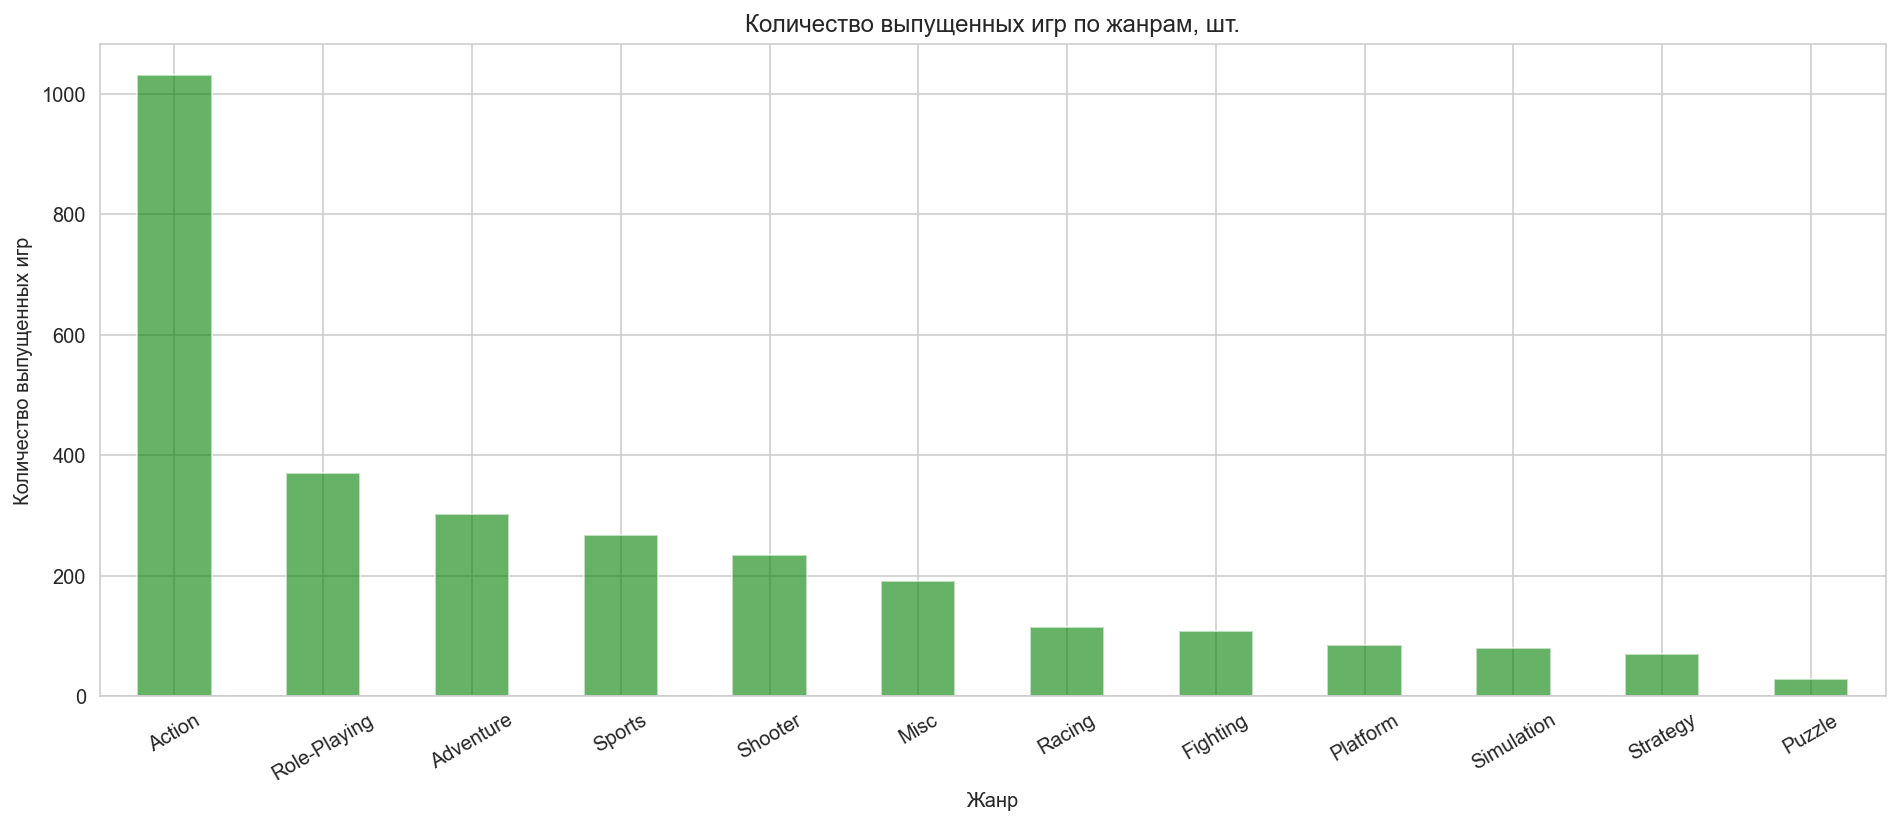

In [64]:
games_actual_genre_count = (
                            games_actual
                                 .pivot_table(index='genre',values='name',aggfunc='count')
                                 .sort_values('name', ascending=False))
games_actual_genre_count.plot(kind='bar', figsize = (16, 6), legend=False, color = 'g', alpha=0.6, 
                              grid=True, title='Количество выпущенных игр по жанрам, шт.', rot=30)
plt.xlabel('Жанр')
plt.ylabel('Количество выпущенных игр');

Заметно, что лидером по жанрам являются Action-игры, на втором месте - RPG, на третьем - приключения. На четвертом расположились спортивные игры.

Меньше всего релизов приходится на те игры, где требуется усидчивость - стратегии, паззлы.

Далее проанализируем, лидирующие жанры по количеству проданных копий игр.

Сгруппируем данные по жанрам, просуммируем продажи, и построим график.

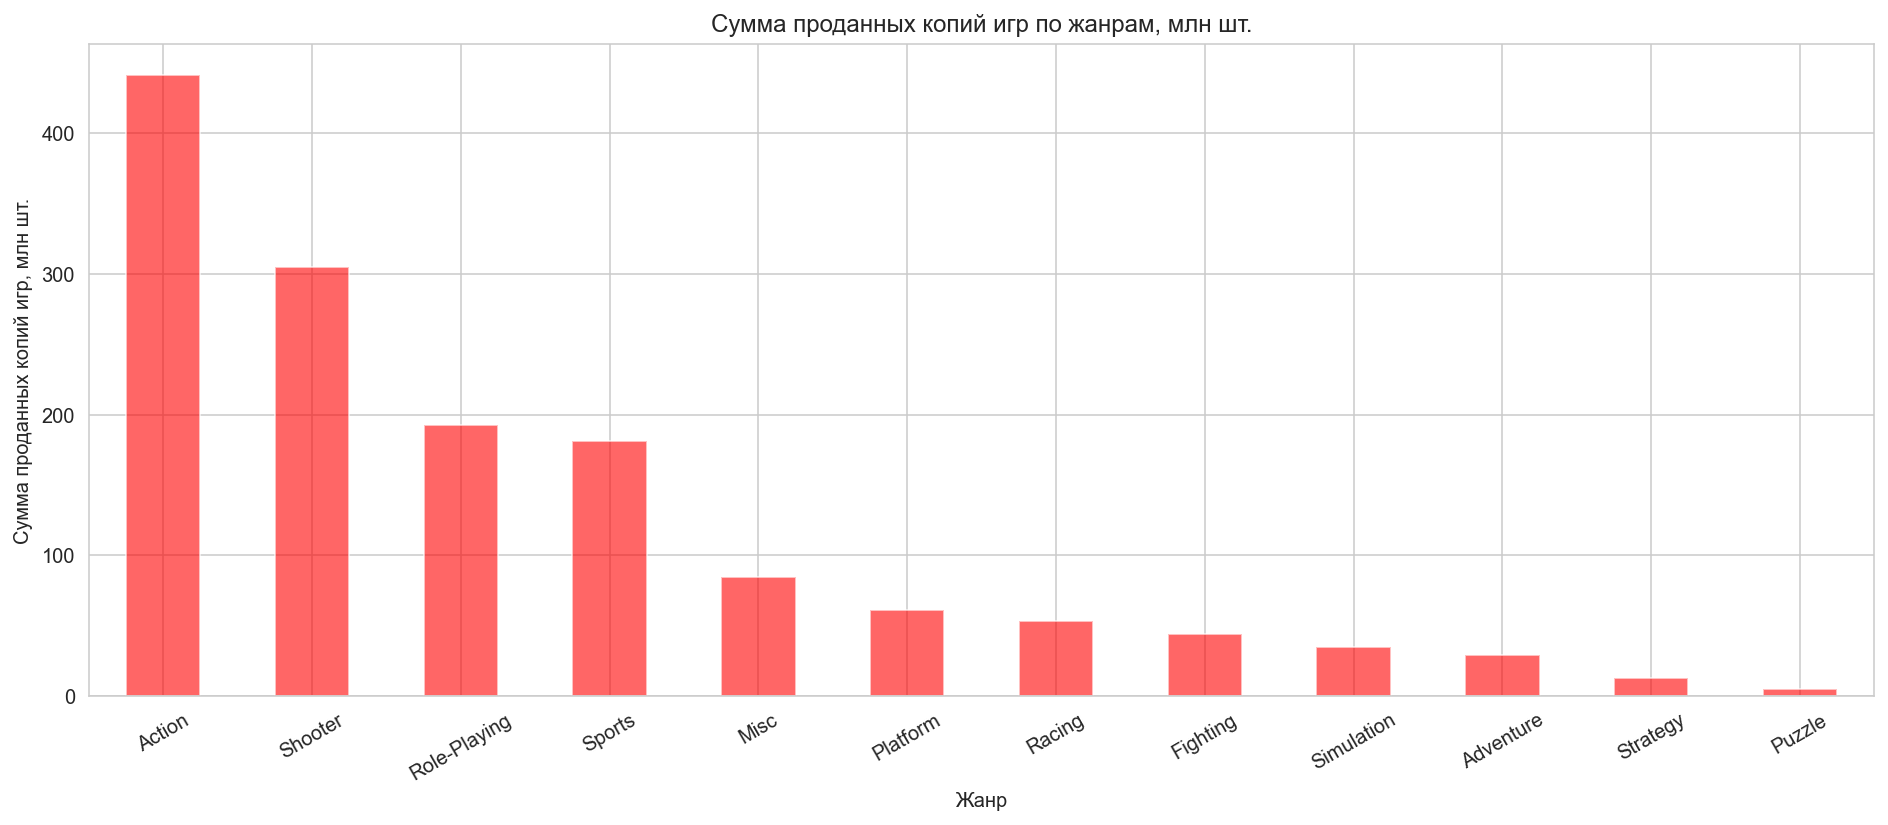

In [65]:
games_actual_genre_sum = (
                            games_actual
                                 .pivot_table(index='genre',values='total_sales',aggfunc='sum')
                                 .sort_values('total_sales', ascending=False))
games_actual_genre_sum.plot(kind='bar', figsize = (16, 6), legend=False, color = 'r', alpha=0.6, 
                            grid=True, title='Сумма проданных копий игр по жанрам, млн шт.',rot=30)
plt.xlabel('Жанр')
plt.ylabel('Сумма проданных копий игр, млн шт.');

Первую позицию заняли также action-игры, а вот на втором месте располоились шутеры. Это означает, что несмотря на небольшое количество релизов шутеров, они раскупаются большим количеством копий.

Третье место заняли RPG.

Также любопытно, что один из лидеров по количеству релизов - приключения - замыкает тройку с конца по продажам. Значит, игр выходит много, но покупаются они неохотно.

Менее всего люди покупают стратегии и пазлы.

### Вывод 

Итак, мы провели исследовательский анализ данных и выявили, существенный рост релизов игр начался в 90-х и достиг своего пика в 2009 году. После этого релизы на игровых платформах пошли на спад. Вероятно, это связано с тем, что разработчики игр стали гораздо больше внимания уделять мобильным платформам, которые в нашем датасете не представлены.

Лидирующей платформой по продажам копий игр в рассматриваемом периоде стала PlayStation 2. Крупнейшая карманная консоль Nintendo DS - расположилась на пятом месте. Всего на 6 крупнейших платформ пришлось почти две трети всех продаж. Мы выяснили, что за 11 лет или раньше платформа "умирает" - продажи игр падают на незначительного уровня. Также мы установили актуальный период в 2012-2016 гг. и в дальнейшем будем анализировать данные только этого отрезка.

В 2014-2015 году перспективными платформами стали Xbox One и PlayStation 4 - они единственные показывали рост в 2015 году по проданным копиям.

Построив ящики с усами по проданным копиям мы обратили внимание, что в разбивке по платформам самыми высокими медианными значениями около 310 тыс. копий обладают Xbox 360.

Также мы построили диаграммы рассеяния, проследив связь между продажами копий и оценками критиков и пользователей. Мы установили, что есть довольно слабая связь между продажами и оценками критиков. Оценки пользователей почти никак не влияют на общие продажи.

Самыми популярными игровыми жанрами по продажам копий стали Action, Shooter, RPG.

## Шаг 4. Портрет пользователя по регионам

На следующем этапе исследования попытаемся составить портрет пользователя каждого региона - Северной Америки, Европы, Японии.

### 4.1 Самые популярные платформы по регионам

Итак, сначала взглянем на самые популярные платформы в разрезе регионов.

Нас интересуют топ-5.

Будем анализировать данные актуального периода.

Поскольку нам нужно будет строить несколько серий однотипных графиков, напишем функцию для их построения.

In [66]:
# Функция получает индекс для группировки и столбец значений, по которому считается сумма
# По этой сводной таблице, в которой отобраны только первые пять строк, затем строится график
# Графики выводятся по 3 в ряд

def regions_portrait(index_group, region_sales, ax):
    df_for_charts = (
                    games_actual
                                .pivot_table(index=index_group, values=region_sales, aggfunc='sum')
                                .sort_values(region_sales, ascending=False)[0:5]
    )
    
    dict_for_titles = {'na_sales': 'Продажи в Северной Америке, млн шт.', 
                       'eu_sales' : 'Продажи в Европе, млн шт.',
                      'jp_sales':'Продажи в Японии, млн шт.'}
    
    dict_for_colors = {'na_sales': 'red', 'eu_sales' : 'blue', 'jp_sales':'green'}
    
    chart = df_for_charts.plot(kind='bar', title=dict_for_titles[region_sales], 
                               color=dict_for_colors[region_sales], fontsize=13, 
                               rot=20, legend=False, ax=axes[ax], ec='black')
    
    chart.set_xlabel('')   

Построим графики.

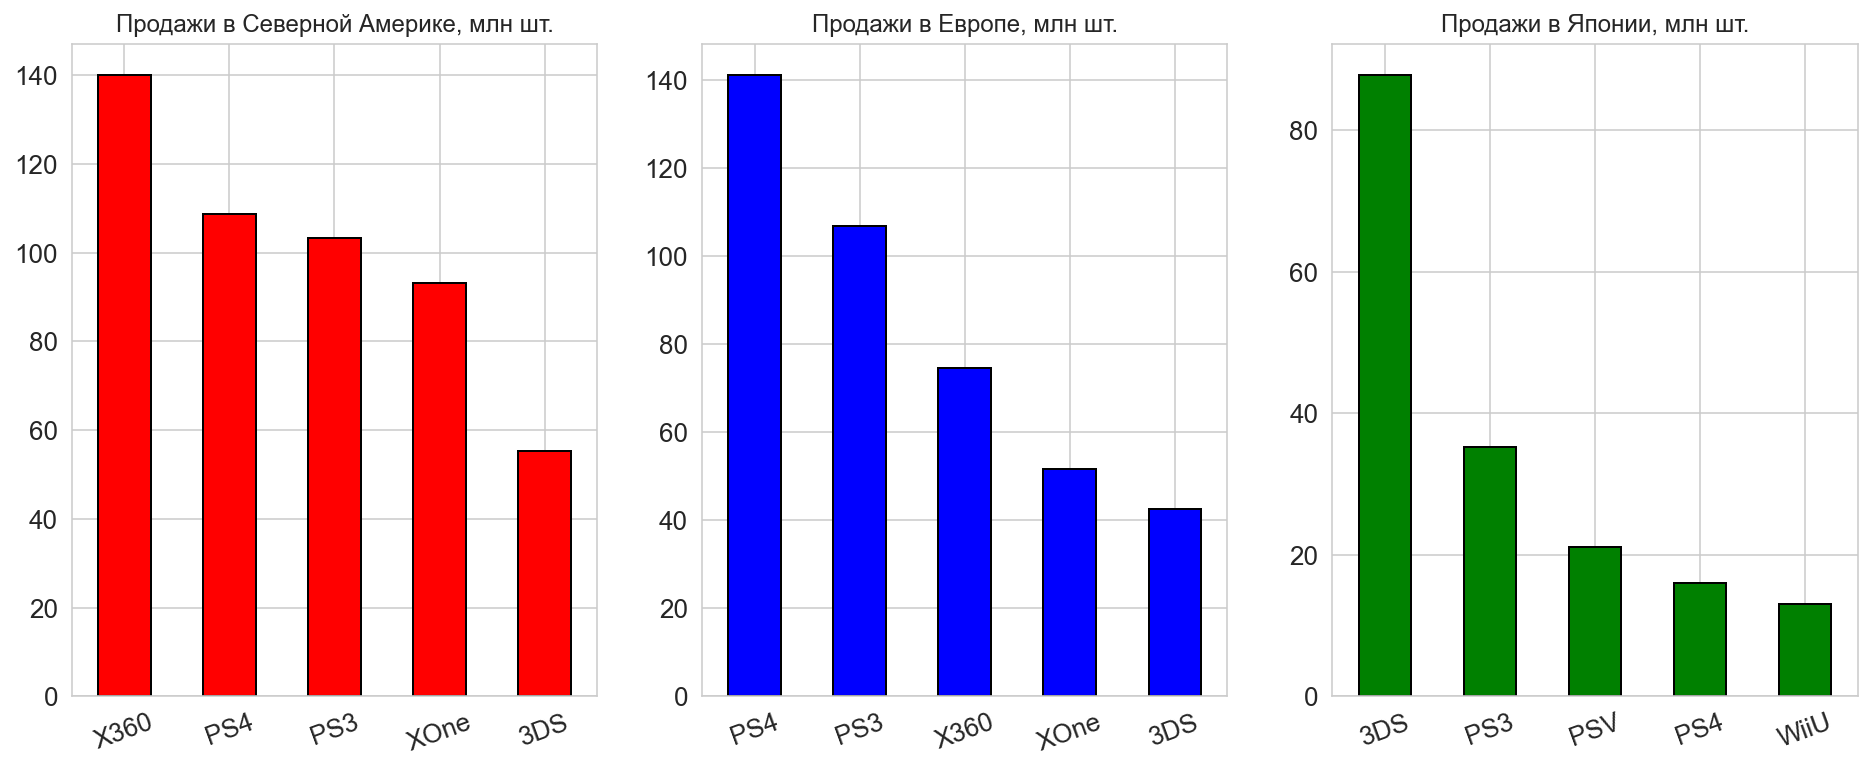

In [67]:
f, axes = plt.subplots(1, 3, figsize=(16,6))

regions_portrait('platform', 'na_sales', 0)
regions_portrait('platform', 'eu_sales', 1)
regions_portrait('platform', 'jp_sales', 2)

В Северной Америке самой популярной платформой в актуальном периоде был Xbox 360.

Около 30 млн игровых копий ей устпила новая PS4.

На третьем месте расположилась PlayStation 3.

На четвертом месте - новый Xbox One, уступающий в конкурентной борьбе PS4.

На пятом - карманная консоль 3DS c существенным отрывом - следтсвие проникновения игр на смартфоны.

В Европе пальму первенства зхватила PS4, второе место - устаревающая PS3. Иксбоксы третьи и четвертые, при этом новый существенно уступает PS4. Здесь либо европейцы не верят в американскую приставку, либо для Microsoft целевым рынком является в большей степени Америка, где дела идут получше.

Пятое место также у карманной 3DS.

Совсем иная ситуация в Японии - в пятерке на 1 и 3 местах - карманные консоли - Nintendo 3DS и PS Vita. При этом новые PS4 и WiiU еще не заняли прочных позиций, уступая PS3. Японцы консервативны!

Из этого можно сделать вывод о том, что в Японии более развита культура игр на портативных платформах.

### 4.2 Самые популярные жанры по регионам

Далее посмотрим на жанры по регионам.

Построим графики.

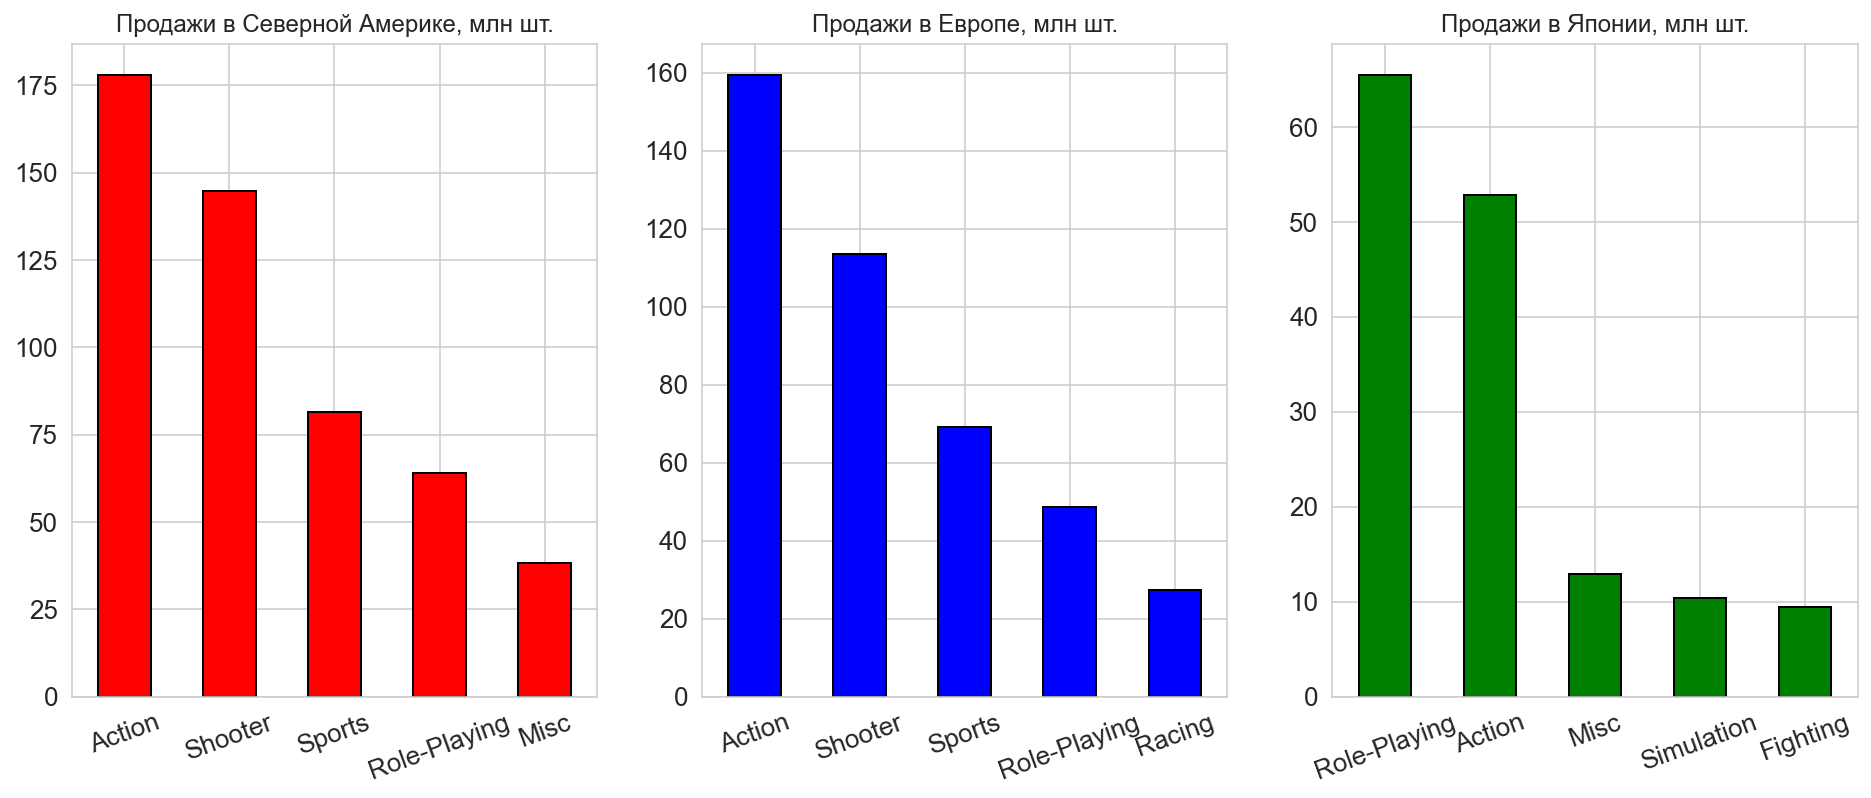

In [68]:
f, axes = plt.subplots(1, 3, figsize=(16,6))

regions_portrait('genre', 'na_sales', 0)
regions_portrait('genre', 'eu_sales', 1)
regions_portrait('genre', 'jp_sales', 2)

В Европе и Северной Америке четверка лидеров одинакова - экшн, шутер, спорт и RPG.

Пятое песто в Америке занимают прочие игры, а в Европе - гонки.

Совсем другая ситуация в Японии - там неоспоримая пальма первенства у RPG. Шутеров вообще в пятерке нет, что может говорить о том, что японцы менее толерантны к насилию, чем Запад. Что, правда, не мешает им играть в файтинги, но это также объясняется культурой восточных единоборств.

### 4.3 Рейтинг ESRB и продажи в регионе

Далее проанализируем влияние рейтинга на продажи.

Для этого расшифруем рейтинг ESRB в возрастные рамки.

Напишем функцию. Она будет принимать столбец и возвращать расшифровку рейтинга.

In [69]:
def rating_desc(rating):
    if rating == 'E' or rating == 'EC':
        return 'Для всех'
    if rating == 'T':
        return '13+'
    if rating == 'E10+':
        return '10+'
    if rating == 'M':
        return '17+'
    else:
        return 'Не определен'

Применим ее к большому датафрейму.

In [70]:
games['rating_description'] = games['rating'].apply(rating_desc)

Переопределим датафрейм с акутальным периодом.

In [71]:
games_actual = games.query('year_of_release > 2011')

Построим графики

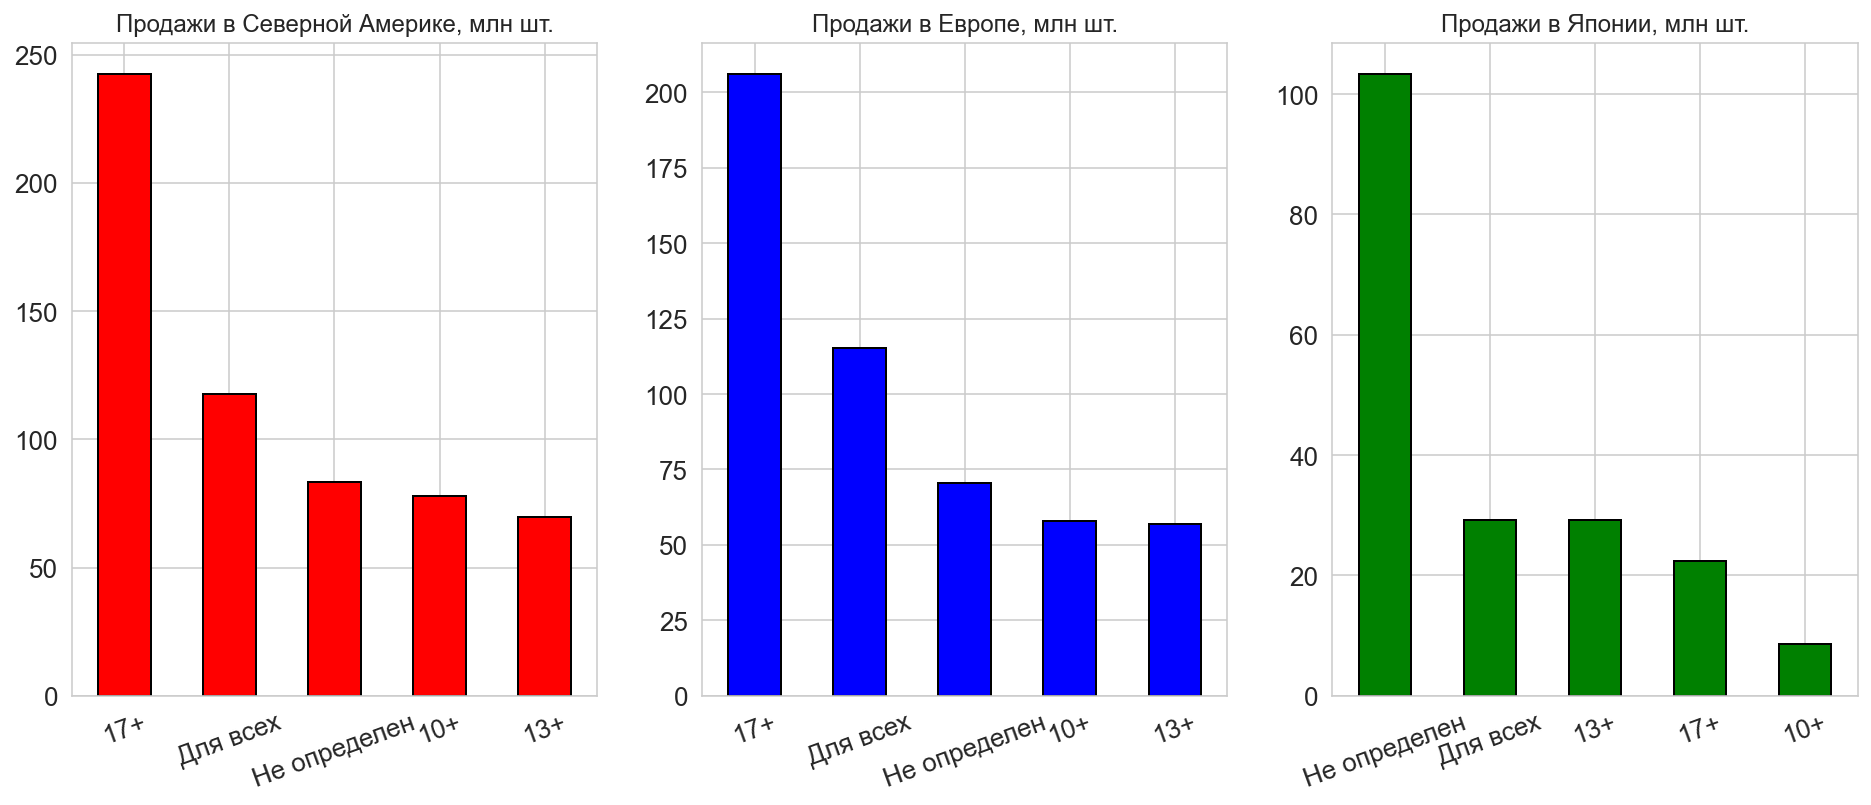

In [72]:
f, axes = plt.subplots(1, 3, figsize=(16,6))

regions_portrait('rating_description', 'na_sales', 0)
regions_portrait('rating_description', 'eu_sales', 1)
regions_portrait('rating_description', 'jp_sales', 2)

И снова в Северной Америке и Европе ситуация с продажами игр определенных рейтингов схожая - самыми популярными являются игры - 17+ и "для всех".

Для многих японских игр нет рейтинга ESRB, а среди тех, у которых он есть - лидируют игры "для всех". Но здесь второе место занимают игры с рейтингом с 13+.

Очень большая доля игр на японском рынке не имеет рейтинга, на мой взгляд, потому что ESRB - это Северо-Американская организация и их компетенции - игры на английском языке.

Думаю, что огромное количество японских игр выходят только на японском языке, и ESRB не в состоянии их отрейтинговать.

### Вывод 

Итак, продажи игр в актуальном периоде по ретйингу и жанру в целом схожи в Северной Америке и Европе. Схожи они и по платформам - но в Северной Америке отдавали предпочтение Xbox 360, а в Европе - новенькой PS4.

Отличительная ситуация в Японии - люди предопчитают карманные консоли, по жанрам лидируют RPG, а шутеров нет и в пятерке.

## Шаг 5. Проверка гипотез

### 5.1 Сравнение средних пользовательских рейтингов платформ Xbox One и PC

Итак, нам необходимо сравнить среднюю оценку пользователей на платформах Xbox One и PC.

В данном случае мы будем формулировать гипотезу о равенстве среднего двух генеральных совокупностей.

Соответственно, первой генеральной совокупностью для нас будут оценки игр на платформе Xbox One, вторая генеральная совокупность - оценки платформы PC.

Соответственно, нам нужно провести тест для того, чтобы у нас появилось мнение о равенстве средних оценок по платформам Xbox One и PC.

Таким образом, нулевая гипотеза Н0 для нас состоит в том, что средние оценки пользователей платформ Xbox One и PC равны.

Следовательно, альтернативная гипотеза H1 - средние оценки пользователей не равны.

Сначала подготовим датафрейм для тестов, уберем нулевые оценки.

In [73]:
games_actual_for_test = games_actual.query('user_score > 0')

Потом посчитаем среднее значение и стандартное отклонение по интересующим нас параметрам.

Для этого определим функцию, рассчитывающее среднюю оценку и ст. отклонение по заданной платформе.

In [74]:
def mean_and_stdev_platform(platform):
    df_for_test = games_actual_for_test.query('platform == @platform')
    print(f'{platform}')
    print(f"Среднее значение пользовательской оценки: {df_for_test['user_score'].mean():.02f}")
    print(f"Ст. отклонение: {np.sqrt(np.var(df_for_test['user_score'],ddof=1)):.2f}\n")

Посчитаем эти параметры для XOne и PC.

In [75]:
mean_and_stdev_platform('XOne')
mean_and_stdev_platform('PC')

XOne
Среднее значение пользовательской оценки: 6.52
Ст. отклонение: 1.38

PC
Среднее значение пользовательской оценки: 6.43
Ст. отклонение: 1.66



Видно, что средняя оценка выше у Xbox One, но меньше стандартное отклонение.

Вернемся к гипотезам.

Чтобы проверить нулевую гипотезу, обратимся к тесту scipy.stats.ttest_ind.

Уровень значимости выберем в 5%.

На наш взгляд, у нас нет оснований полагать, что дисперсии выборок одинаковые, а значит установим параметр  "equal_var = False".

Итак, передадим методу два массива, содержащие выборки.

In [76]:
alpha_level = 0.05
results_platforms = ( 
    st.ttest_ind(games_actual_for_test.query('platform == "XOne"')['user_score'],
                games_actual_for_test.query('platform == "PC"')['user_score'],equal_var = False )  
)

Итак, выведем на экран p-значение, и сравним его с уровнем значимости.

In [77]:
print(f"p-значение: {results_platforms.pvalue:.3f}")
if results_platforms.pvalue < alpha_level: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.549
Не получилось отвергнуть нулевую гипотезу


### Вывод 

Итак, полученное значение p-value говорит о том, что, если нулевая гипотеза верна, вероятность получить такие или более выраженные различия в выборочных средних - составляет почти 0.55, что является слишком большой вероятностью, чтобы сказать, что различие в оценках на платформах значимо. У нас недостаточно оснований, чтобы отвергнуть нулевую гипотезу.

### 5.2 Сравнение средних пользовательских рейтингов жанров Action и Sports

ЗДесь нам необходимо сравнить среднюю оценку пользователей по жанру "экшн" и "спорт".

В данном случае мы будем формулировать гипотезу о равенстве среднего двух генеральных совокупностей.

Соответственно, первой генеральной совокупностью для нас будут оценки игр жанра Action , вторая генеральная совокупность - оценки жанра Sports.

Соответственно, нам нужно провести тест для того, чтобы у нас появилось мнение о равенстве средних оценок двух выборок - жанров Aсtion и Sports.

Таким образом, нулевая гипотеза Н0 для нас состоит в том, что средние оценки пользователей для жанров Aсtion и Sports равны.

Следовательно, альтернативная гипотеза H1 - средние оценки пользователей не равны.

Посчитаем среднее значение и стандартное отклонение по интересующим нас параметрам.

Для этого определим функцию, рассчитывающее среднюю оценку и ст. отклонение по заданному жанру.

In [78]:
def mean_and_stdev_genre(genre):
    df_for_test = games_actual_for_test.query('genre == @genre')
    print(f'{genre}')
    print(f"Среднее значение пользовательской оценки: {df_for_test['user_score'].mean():.02f}")
    print(f"Ст. отклонение: {np.sqrt(np.var(df_for_test['user_score'],ddof=1)):.2f}\n")

Посчитаем эти параметры для Aсtion и Sports.

In [79]:
mean_and_stdev_genre('Action')
mean_and_stdev_genre('Sports')

Action
Среднее значение пользовательской оценки: 6.83
Ст. отклонение: 1.37

Sports
Среднее значение пользовательской оценки: 5.46
Ст. отклонение: 1.74



Видно, что средняя оценка выше у Action, но у Sports больше стандартное отклонение.

Вернемся к гипотезам.

Чтобы проверить нулевую гипотезу, обратимся к тесту scipy.stats.ttest_ind.

Уровень значимости выберем в 5%.

На наш взгляд, у нас нет оснований полагать, что дисперсии выборок одинаковые, а значит установим параметр  "equal_var = False".

Итак, передадим методу два массива, содержащие выборки.

In [80]:
results_genres = ( 
    st.ttest_ind(games_actual_for_test.query('genre == "Action"')['user_score'],
                games_actual_for_test.query('genre == "Sports"')['user_score'],equal_var = False )  
)

Итак, выведем на экран p-значение, и сравним его с уровнем значимости.

In [81]:
print(f"p-значение: {results_genres.pvalue}")
if results_genres.pvalue < alpha_level: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


### Вывод 

Итак, полученное значение p-value говорит о том, что, если нулевая гипотеза верна, то вероятность получить наблюдаемое или большее различие в средних оценках двух жанров - крайне-крайне низкое. Следовательно, различие между средними оценками значимо. Мы отвергаем нулевую гипотезу, средние оценки пользователей разных для жанров не равны.

Интересно, что если взять данные за весь период, а не только за актуальный, то у нас не получится отвергнуть нулевую гипотезу, так как различие в оценках двух жанров может быть случайным с вероятностью около 10%.

In [82]:
games_for_test = games.query('user_score > 0')

In [83]:
results_genres_2 = ( 
    st.ttest_ind(games_for_test.query('genre == "Action"')['user_score'],
                games_for_test.query('genre == "Sports"')['user_score'],equal_var = True )  
)

In [84]:
print(f"p-значение: {results_genres_2.pvalue}")
if results_genres_2.pvalue < alpha_level: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


## Шаг 6. Общий вывод

Итак, нам как интернет-магазину необходимо сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

 1. Нам следует оринетироваться на платформы, которые находятся в начале срока жизни (1-3 года) - это Xbox One и PlayStation 4. При этом ориентироваться нужно только на них, ведь остальные платформы испытывали двузначное снижение проданных копий.
 
 
 2. Кроме этого, мы должны мониторить перспективные платформы и каждый год оценивать динамику роста проданных копий в разрезе платформ.
 
 
 3. Средние уровни проданных копий для Xone и PS4 является одним из самых высоких. Мы и так делаем ставку только на эти две платформы.
 
 
 4. Мы должны уделять повышенное внимание оценкам критиков при планировании, с этим параметром хоть и слабая, но связь есть. Однако если нас занесет в Японию, то и оценки критиков помогут не сильно.
 
 
 5. Самыми популярными игровыми жанрами являются Action, Shooter, RPG.
 
 
 6. Если говорить о регионах, то Запад (Европа и Сев.Америка) любит примерно одно и то же. Кроме этого, мы можем ожидать, что в этих регионах на лидирующие позиции среди платформ будут Xbox One и PS4. А вот в Японии надо будет мониторить появление портативных новинок от Nintendo.
 
 
 7. То же касается и предпочтений в жанрах у западных геймеров - Action, Shooter, RPG. Если мы говорим о Японии, то без предложений в сегменте RPG туда лучше не заходить.
 
 
 8. Рейтинги - самые продаваемые игры - "17+", потом - "для всех".
 
 
 9. Мы оттестировали гипотезы на равенство оценок по платформе Xbox One и PC, оказалось, что у нас нет оснований считать, что средние оценки не равны. Возникает вопрос о целесообразности приобретения новых XBox пользователями, если они получают сопоставимый уровень удовольствия от игры на ПК. Возможно, в будущем стоит провести тесты для PS4 и отдать предпочтение ей.  
 
 
 10. Также мы проверяли равенство средних оценок игроков для жанров Action и Sports, также выявив, что они не равны. При этом средняя оценка Action выше. С учетом того, что спортивный жанр теряет свою популярность, лучше ориентироваться при планировании прода на самый популярный жанр, да еще и с более высокой оценкой.